<pre>
퍼셉트론에서는 가중치(w,b)의 값을 직접 명시해주어야 했다.
신경망이 도입되면 이 가중치를 직접 명시하는 문제를 해결 할 수 있다.
퍼셉트론과 신경망의 가장 큰 차이는 활성화 함수의 차이다.
퍼셉트론은 활성화 함수로 계단함수(step function)을 사용했다.
즉, 특정 값보다 커지면 1, 아니면 0인 방식을 사용했다.
신경망에서는 활성화 함수로 시그모이드(sigmoid function)을 사용한다.

sigmoid function
h(x) = 1 / (1 + exp^(-x))
</pre>

<h1>계단 함수 구현하기</h1>

In [3]:
!pip install numpy

<pre>
인자 x로 numpy 배열을 넣을 경우
배열 x의 각 원소가 0보다 크다면 true, 아니면 false인 배열을 y에 저장한다.
bool 배열 y를 np.int의 형태로 변환한다.
</pre>

In [2]:
import numpy as np
def step_function(x):
    y = x>0
    return y.astype(np.int)

In [4]:
step_function(np.array([-1.0, 1.0, 2.0]))

array([0, 1, 1])

<h1>계단 함수의 그래프</h1>

In [6]:
!pip install matplotlib

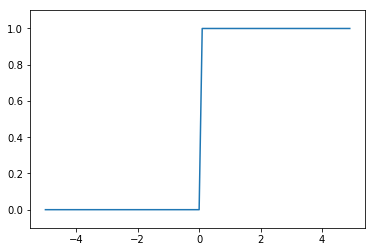

In [8]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

<h1> 시그모이드 함수 구현하기</h1>

In [9]:
import numpy as np
def sigmoid(x):
    return 1/ (1 + np.exp(-x))

In [12]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([ 0.26894142,  0.73105858,  0.88079708])

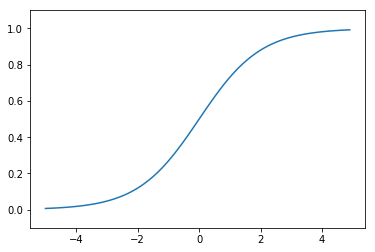

In [15]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

<h1>ReLU 함수</h1>

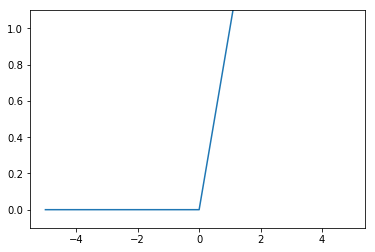

In [17]:
import numpy as np
import matplotlib.pylab as plt
def relu(x):
    return np.maximum(0, x) # 두 입력 중 큰 값을 선택해 반환

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [18]:
import numpy as np

In [19]:
A = np.array([1, 2, 3, 4])

In [20]:
print(A)

[1 2 3 4]


In [21]:
np.ndim(A) # 배열의 차원 수

1

In [22]:
A.shape # 배열의 형상, 1차원 배열, 원소 4개, tuple 반환

(4,)

In [23]:
A.shape[0]

4

In [33]:
B = np.array([[1,2], [3,4], [5,6]])

In [34]:
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [35]:
np.ndim(B)

2

In [36]:
B.shape # 1차원 원소 3개, 2차원 원소 2개

(3, 2)

<h1>행렬의 내적(행렬 곱)</h1>

In [38]:
import numpy as np
A = np.array([[1,2], [3,4]])
print(A.shape)
B = np.array([[5,6], [7,8]])
print(B.shape)
np.dot(A, B)

(2, 2)
(2, 2)


array([[19, 22],
       [43, 50]])

<h1>신경망의 내적</h1>

<pre>
y1 = 1x1 + 2x2
y2 = 3x1 + 4x2
y3 = 5x1 + 6x2

X는 1x2 배열
W는 2x3 배열
따라서 Y는 1x3 배열
</pre>

In [41]:
import numpy as np
X = np.array([1,2])
W = np.array([[1,3,5],[2,4,6]])
Y = np.dot(X,W)
print(Y)

[ 5 11 17]


<h1>3층 신경망 구현하기</h1>

![title](img/3-17.png)
<pre>
0층(입력층) : 2개 뉴런
1층(은닉층) : 3개 뉴런
2층(은닉층) : 2개 뉴런
3층(출력층) : 2개 뉴런

* 1뉴런 : 편향 뉴런
w(1)12 : 1층으로 향하고 전층2뉴런에서 다음층1뉴런으로 가는 가중치
a(1)2  : 1층의 2뉴런

편향 뉴런 1x3
입력 뉴런 1x2
가중치 2x3
1층 뉴런 1x3

</pre>

In [43]:
import numpy as np
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape) # (2, 3)
print(X.shape)  # (2,)
print(B1.shape) # (3,)

A1 = np.dot(X, W1) + B1
print(A1)

(2, 3)
(2,)
(3,)
[ 0.3  0.7  1.1]


![title](img/3-18.png)

<pre>
행렬 내적으로 얻은 A1을 활성화 함수 h()로 처리한다.
활성화 함수로 시그모이드 함수를 사용한다.
</pre>

In [52]:
Z1 = sigmoid(A1)

print("활성화 함수 적용 전 : ", A1)
print("활성화 함수 적용 후 : ", Z1)

활성화 함수 적용 전 :  [ 0.3  0.7  1.1]
활성화 함수 적용 후 :  [ 0.57444252  0.66818777  0.75026011]


<pre>
이제 1층에서 2층으로 가는 과정을 구현해본다.
편향 뉴런 : 1x2
1층 뉴런 : 1x3
가중치 : 3x2
2층 뉴런 : 1x2
</pre>

In [53]:
import numpy as np

W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape) # (3,)
print(W2.shape) # (3,2)
print(B2.shape) # (2,)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

print("활성화 함수 적용 전 : ", A2)
print("활성화 함수 적용 후 : ", Z2)

(3,)
(3, 2)
(2,)
활성화 함수 적용 전 :  [ 0.51615984  1.21402696]
활성화 함수 적용 후 :  [ 0.62624937  0.7710107 ]


<pre>
마지막으로 2층에서 출력층으로 가는 구간이다.
여기서는 활성화 함수를 바꿔준다.

편향 : 1x2
2층 : 1x2
가중치 : 2x2
출력층 : 1x2
</pre>

In [54]:
import numpy as np

def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3) # 출력
print("활성화 함수 적용 전 : ", A3)
print("활성화 함수 적용 후 : ", Y)

활성화 함수 적용 전 :  [ 0.31682708  0.69627909]
활성화 함수 적용 후 :  [ 0.31682708  0.69627909]


<h1>구현 정리</h1>

In [56]:
import numpy as np

def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[ 0.31682708  0.69627909]


<pre>
일반적으로 출력층은 어떤 문제냐에 따라 사용하는 활성화 함수가 달라진다.
분류 문제에는 소프트맥수 함수를 사용하고 회귀에서는 항등 함수를 사용한다.
</pre>

<h1>소프트맥스함수 구현하기</h1>

![title](img/softmax.png)

j번째 출력

In [57]:
a = np.array([0.3, 2.9, 4.0])

In [58]:
exp_a = np.exp(a)

In [59]:
print(exp_a)

[  1.34985881  18.17414537  54.59815003]


In [60]:
sum_exp_a = np.sum(exp_a)

In [61]:
print(sum_exp_a)

74.1221542102


In [62]:
y = exp_a / sum_exp_a

In [63]:
print(y)

[ 0.01821127  0.24519181  0.73659691]


In [64]:
import numpy as np

def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [65]:
a = np.array([1010, 1000, 990])

In [66]:
print(softmax(a)) # 값이 너무 커져 오버플로우가 발생한다.

[ nan  nan  nan]


/Users/inki/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/Users/inki/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


In [18]:
import numpy as np

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # 오버플로우 방지
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [69]:
print(softmax(a))

[  9.99954600e-01   4.53978686e-05   2.06106005e-09]


<pre>
소프트맥스 함수의 출력은 0에서 1.0 사이의 실수다.
소프트맥스 함수 출력의 총 합은 1이다.
이 성질을 이용해 '확률'로 해석할 수 있다.
</pre>

In [70]:
print(softmax(a))

[  9.99954600e-01   4.53978686e-05   2.06106005e-09]


In [71]:
print(np.sum(softmax(a)))

1.0


<pre>
소프트맥스의 출력은 확률로 해석된다.
이 뜻은 확률이 가장 높은 원소는 원래부터 가장 큰 값이었다는 뜻이다.
즉, 기계학습의 문제풀이 과정 학습과 추론에서 추론일 경우 소프트맥스 함수를 생략해도 된다.
신경망을 학습시킬 때 출력층에서 소프트맥스 함수를 주로 사용한다.
</pre>

<h1>손글씨 숫자 인식</h1>
<pre>
이미 학습된 매개변수를 사용하여 학습 과정은 생략하고 추론과정만 구현한다.
이 추론 과정을 순전파(foward propagation)이라고 한다.

normalize : 이미지 픽셀 값을 0.0~1.0(True) 아니면 원래 값 0~255(False)
flatten : 이미지를 평탄하게, 1차원 배열로(True) 아니면 원래 값 1x28x28(False)
</pre>

In [75]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

print(x_train.shape) # 훈련 이미지
print(t_train.shape) # 훈련 레이블
print(x_test.shape)  # 시험 이미지
print(t_test.shape)  # 시험 레이블

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [78]:
!pip install Pillow

<pre>
flatten = True # 이미지를 1차원으로 만든다.
출력할 때는 이미지를 reshape으로 원래 차원(1x28x28)으로 만든다.
numpy array가 인자로 들어갔기 때문에 fromarray로 pil용 이미지로 변환한다.
</pre>

In [1]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label) # 5

print(img.shape) # (784,)
img = img.reshape(28, 28)
print(img.shape) # (28,28)

img_show(img)

5
(784,)
(28, 28)


<pre>
MNIST 데이터셋을 이용해 추론을 수행하는 신경망을 구현한다.
입력층은 784개, 출력층은 10개의 뉴런으로 구성한다.
입력층은 이미지의 크기가 28x28=784이기 때문이고 출력층은 0부터 9까지의 숫자를 구분하는 문제이기 때문이다.
은닉층은 2개로 첫번째는 50개, 두번째는 100개의 뉴런을 배치한다.
</pre>

In [19]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
import _pickle as pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

def sigmoid(x):
    return 1/ (1 + np.exp(-x))

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # 오버플로우 방지
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

<pre>
구조는 이전에 진행해왔던 바와 같다.
numpy의 argmax는 numpy array 중 가장 큰 값을 반환한다.
출력층에서 10개의 뉴런에 각 숫자일 확률이 저장되어있고 argmax를 이용해 가장 확률이 높은 수의 인덱스를 가져온다.
그리고 테스트 데이터와 비교해 같으면 정확도를 증가시킨다.
</pre>

In [20]:
import numpy as np

x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)) :
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:", str(float(accuracy_cnt) / len(x)))

Accuracy: 0.9352


<h1>배치 처리</h1>
<pre>
입력 데이터를 살펴보자.
입력 데이터 x는 10000개의 데이터가 있고 각각 784개의 데이터를 가지고 있다.
784개의 입력 뉴런은 50개 뉴런을 가진 첫번째 은닉층을 거치고, 100개의 뉴런을 가진 두번째 은닉층을 거친다.
마지막으로 10개의 출력층을 거치게 된다.

이처럼 하나로 묶은 입력 데이터를 배치(batch)라고 한다.
</pre>

In [21]:
x, _ = get_data()

In [22]:
network = init_network()

In [23]:
W1, W2, W3 = network['W1'], network['W2'], network['W3']

In [24]:
x.shape

(10000, 784)

In [25]:
x[0].shape

(784,)

In [26]:
W1.shape

(784, 50)

In [27]:
W2.shape

(50, 100)

In [28]:
W3.shape

(100, 10)

<pre>
일반적으로 컴퓨터는 묶음처리를 해줄 때 더 빠른 연산속도를 낸다.
숫자 추론을 batch를 이용해 특정묶음으로 일을 처리하면 연산속도가 더 빨라진다.
</pre>

In [29]:
import numpy as np

x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size) :
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:", str(float(accuracy_cnt) / len(x)))

Accuracy: 0.9352
